In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
      

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv


In [7]:
df_india = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")
df_individual = pd.read_csv("/kaggle/input/covid19-in-india/IndividualDetails.csv")
df_population = pd.read_csv("/kaggle/input/covid19-in-india/population_india_census2011.csv")
df_imcrt = pd.read_csv("/kaggle/input/covid19-in-india/ICMRTestingLabs.csv")
df_hospital_bed = pd.read_csv("/kaggle/input/covid19-in-india/HospitalBedsIndia.csv")
df_age_group = pd.read_csv("/kaggle/input/covid19-in-india/AgeGroupDetails.csv")



In [8]:
df_india['ConfirmedIndianNational'] = df_india.ConfirmedIndianNational.replace('-',0)
df_india['ConfirmedForeignNational'] = df_india.ConfirmedForeignNational.replace('-',0)
df_india['ConfirmedIndianNational']= df_india['ConfirmedIndianNational'].astype('int64')
df_india['ConfirmedForeignNational']= df_india['ConfirmedForeignNational'].astype('int64')

In [9]:
df_india['Total Cases'] = df_india['Confirmed']
df_india['Active Cases'] = df_india['Total Cases'] - df_india['Cured'] - df_india['Deaths']
df_india["Date"] = pd.to_datetime(df_india["Date"],infer_datetime_format=True,dayfirst=True)

In [10]:
recent_date = df_india['Date'].max()

In [11]:
covid_19_india = df_india[df_india['Date']==recent_date]
covid_19_india[["Date",'State/UnionTerritory','Confirmed','Cured','Deaths']]

,Date,State/UnionTerritory,Confirmed,Cured,Deaths
2738,2020-06-07,Andaman and Nicobar Islands,33,33,0
2739,2020-06-07,Andhra Pradesh,4510,2620,73
2740,2020-06-07,Arunachal Pradesh,47,1,0
2741,2020-06-07,Assam,2397,547,4
2742,2020-06-07,Bihar,4915,2425,30
2743,2020-06-07,Chandigarh,309,273,5
2744,2020-06-07,Chhattisgarh,923,266,4
2745,2020-06-07,Dadar Nagar Haveli,19,1,0
2746,2020-06-07,Delhi,27654,10664,761
2747,2020-06-07,Goa,267,65,0


In [12]:
df_india['State/UnionTerritory'].nunique()

37

In [13]:
df_india.shape

(2774, 11)

In [14]:
df_india=df_india.drop(["Sno"],axis=1)

In [15]:
df_india.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
Total Cases                 0
Active Cases                0
dtype: int64

In [16]:
df_india_date_wise = df_india.groupby(['Date','State/UnionTerritory','Total Cases'])['Cured','Deaths','Active Cases','Confirmed'] \
            .sum().reset_index().sort_values('Total Cases',ascending = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
recent_date = df_india['Date'].max()
print(recent_date)

2020-06-07 00:00:00


In [18]:
df_india_date_wise

,Date,State/UnionTerritory,Total Cases,Cured,Deaths,Active Cases,Confirmed
2758,2020-06-07,Maharashtra,82968,37390,2969,42609,82968
2722,2020-06-06,Maharashtra,80229,35156,2849,42224,80229
2686,2020-06-05,Maharashtra,77793,33681,2710,41402,77793
2650,2020-06-04,Maharashtra,74860,32329,2587,39944,74860
2614,2020-06-03,Maharashtra,72300,31333,2465,38502,72300
...,...,...,...,...,...,...,...
1047,2020-04-17,Nagaland,0,0,0,0,0
1014,2020-04-16,Nagaland,0,0,0,0,0
1146,2020-04-20,Nagaland,0,0,0,0,0
981,2020-04-15,Nagaland,0,0,0,0,0


# Covid-19 Sürecinde Hindistan'daki Veriler

**Eyaletlerdeki Ölümlü Vaka ve İyileşen Vaka Sayıları**

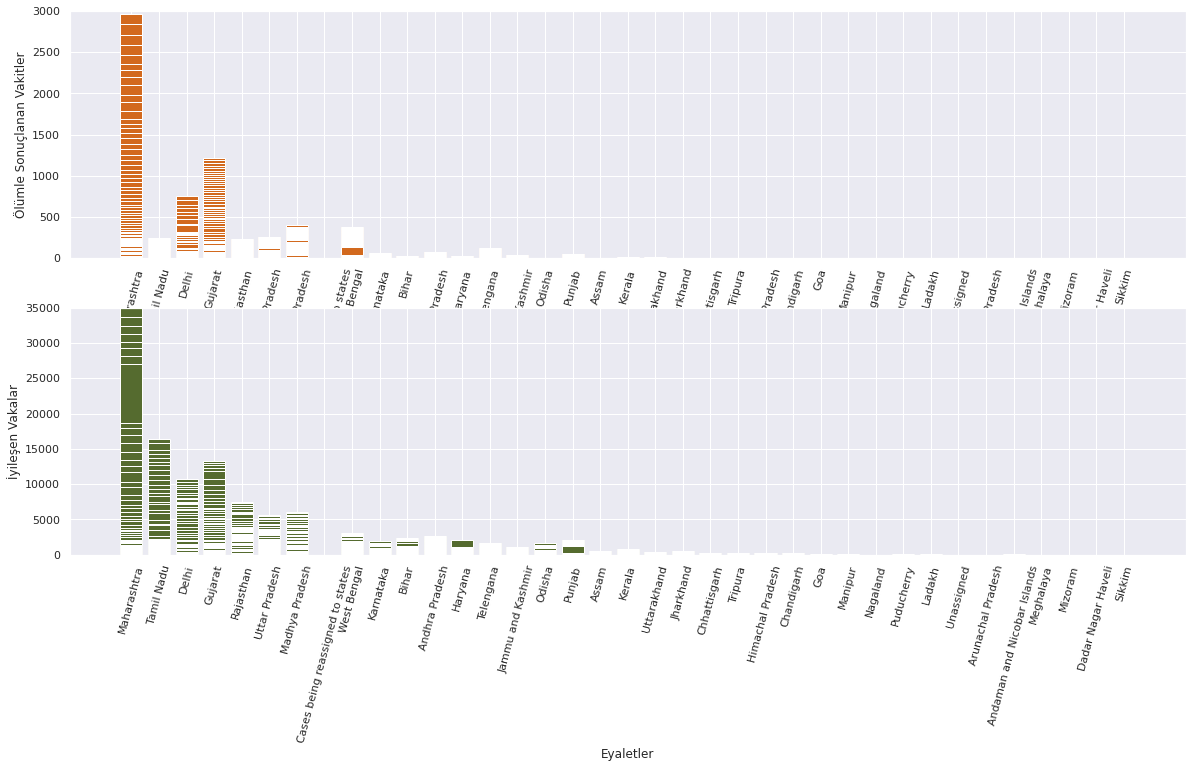

In [19]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Deaths"],color='chocolate')
plt.xticks(rotation=75)
plt.ylim(0,3000)
plt.xlabel("Eyaletler")
plt.ylabel("Ölümle Sonuçlanan Vakitler")

plt.subplot(2,1,2)
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Cured"],color='darkolivegreen')
plt.xlabel("Eyaletler")
plt.ylabel("İyileşen Vakalar")
plt.ylim(0, 35000)

plt.xticks(rotation=75)

plt.show()

*Burada açık bir şekilde gördüğümüz üzere "Maharashtra" eyaleti Covid-19 sürecinden Hindistan'ın en çok etkilenen eyaleti*

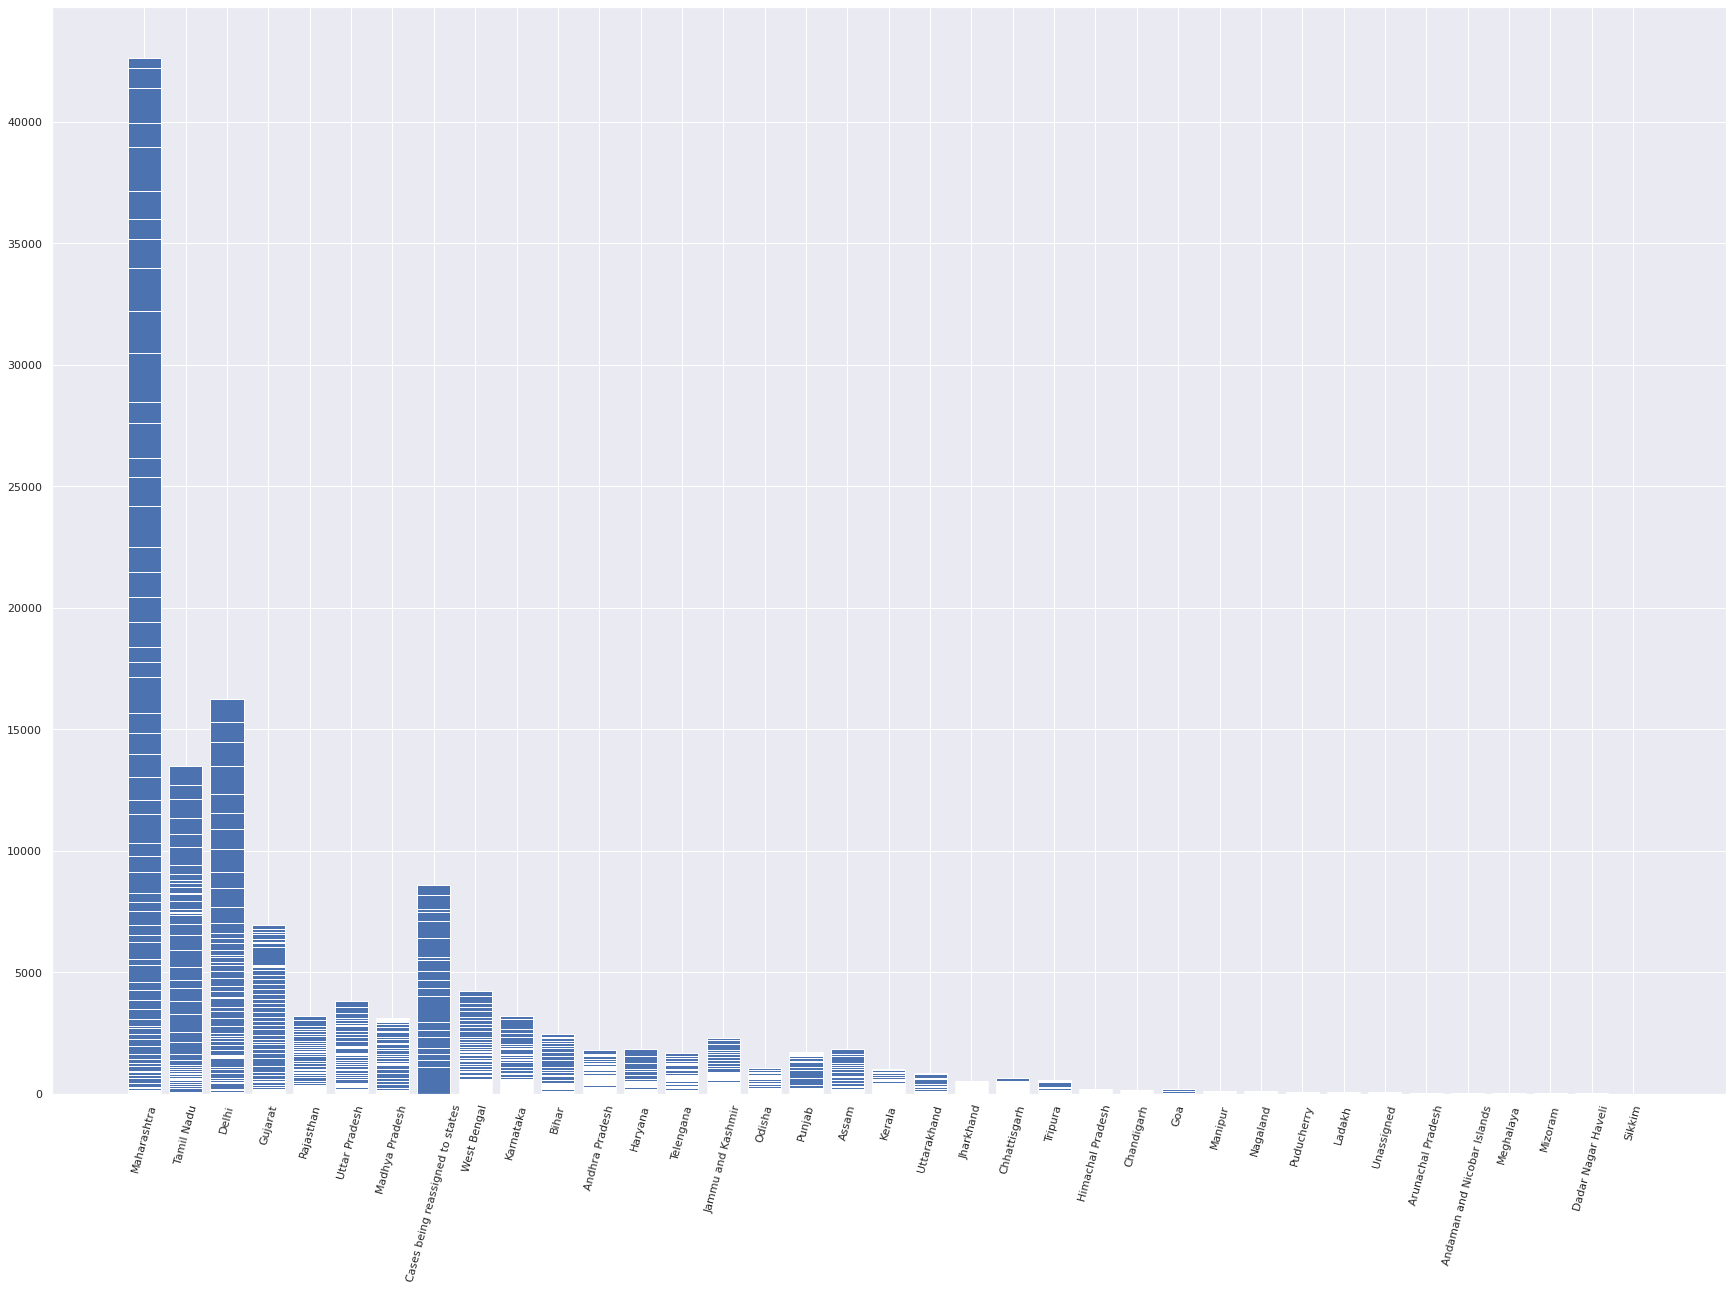

In [20]:
#aktif vakalar
plt.figure(figsize=(30,20))
plt.bar(df_india_date_wise["State/UnionTerritory"],df_india_date_wise["Active Cases"])
plt.xticks(rotation=75)
plt.show()

*Aktif vakalar arasında "Maharashtra" eyaleti önde*

In [21]:
tmp = df_india_date_wise.groupby(['Date'])["Active Cases","Cured","Deaths","State/UnionTerritory","Confirmed"].sum().reset_index()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
tmp.tail(1000)

,Date,Active Cases,Cured,Deaths,Confirmed
0,2020-01-30,1,0,0,1
1,2020-01-31,1,0,0,1
2,2020-02-01,2,0,0,2
3,2020-02-02,3,0,0,3
4,2020-02-03,3,0,0,3
...,...,...,...,...,...
125,2020-06-03,101497,100303,5815,207615
126,2020-06-04,106737,104107,6075,216919
127,2020-06-05,110960,109462,6348,226770
128,2020-06-06,115942,114073,6642,236657


*Vaka sayısı, ölüm sayısı,aktif hasta sayısı hergün artmakta ancak iyileşen vaka sayısı, aktif vaka sayısına yaklaşmış. Buradan çıkaracağımız sonuç Hindistan yakın bir zamanda Covid-19 sürecinde Peak noktayı görecek. Bu süreçten sonra aktif vaka, ölüm gibi istatistikler düşecek.*

**Günlere Göre Aktif Vaka Sayıları**

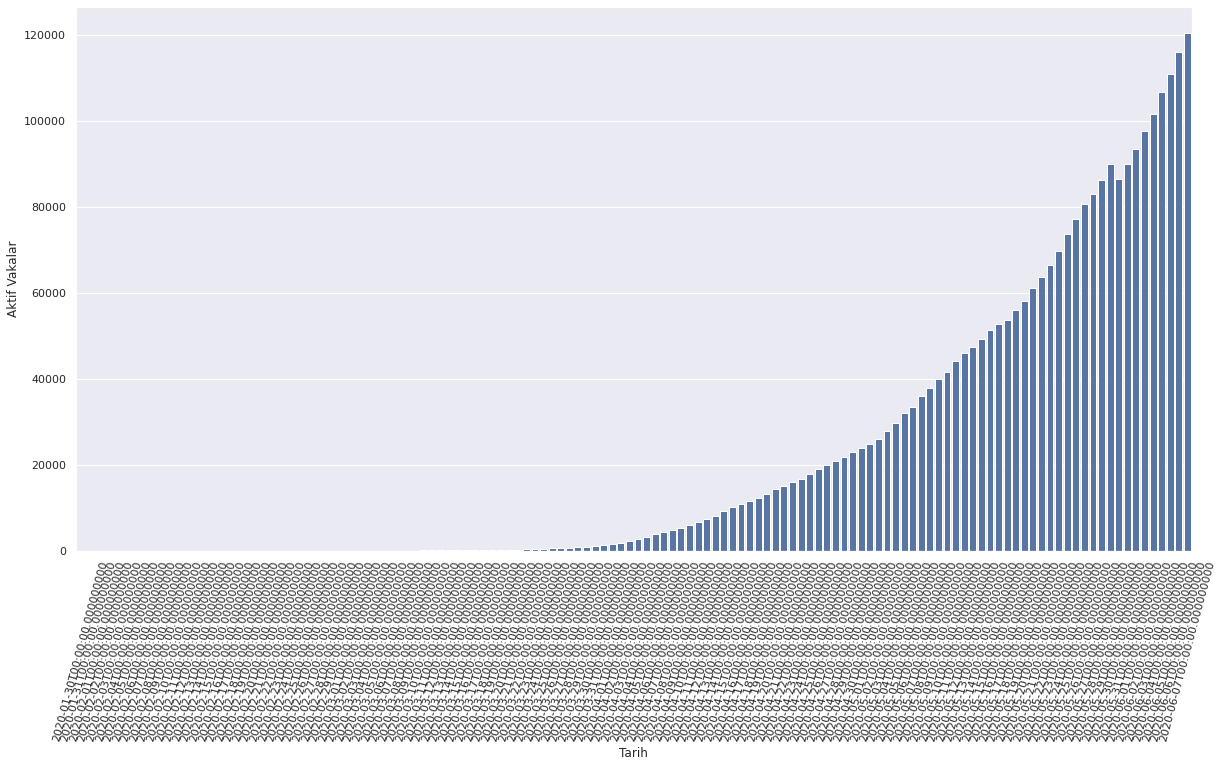

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(tmp["Date"],tmp["Active Cases"],color="b")
plt.xticks(rotation=75)
plt.xlabel("Tarih")
plt.ylabel("Aktif Vakalar")
plt.show()

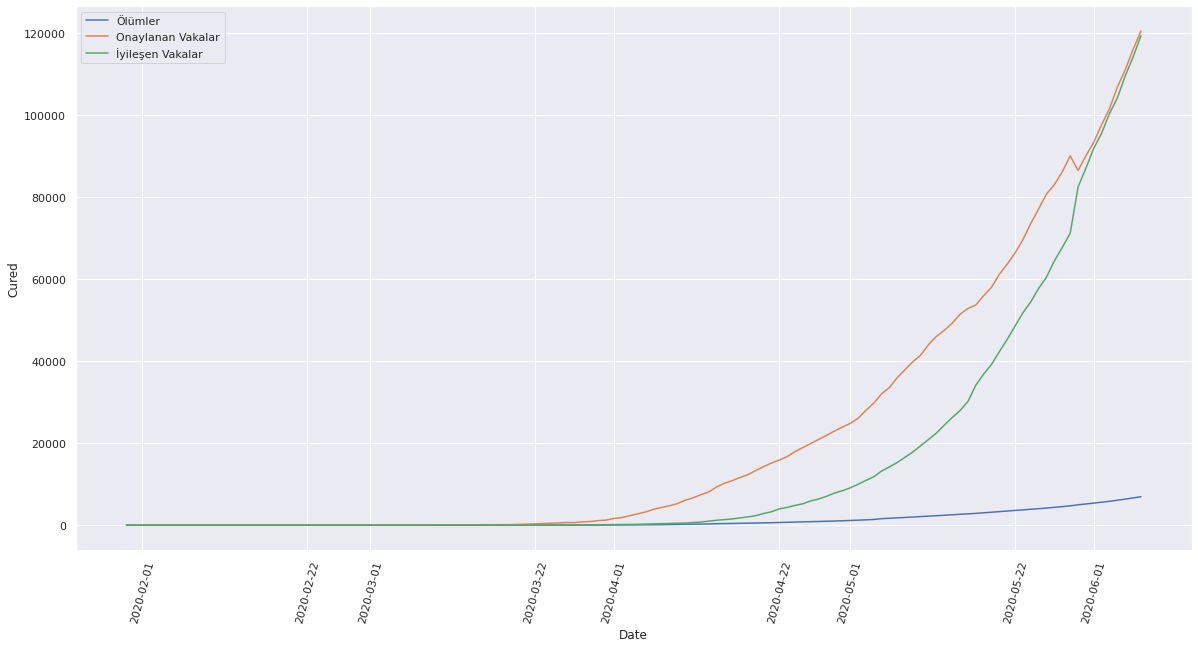

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(tmp["Date"],tmp["Deaths"],estimator="median")
sns.lineplot(tmp["Date"],tmp["Active Cases"],estimator="median")
sns.lineplot(tmp["Date"],tmp["Cured"],estimator="median")
plt.xticks(rotation=75)
plt.legend(["Ölümler","Onaylanan Vakalar","İyileşen Vakalar"])
plt.show()

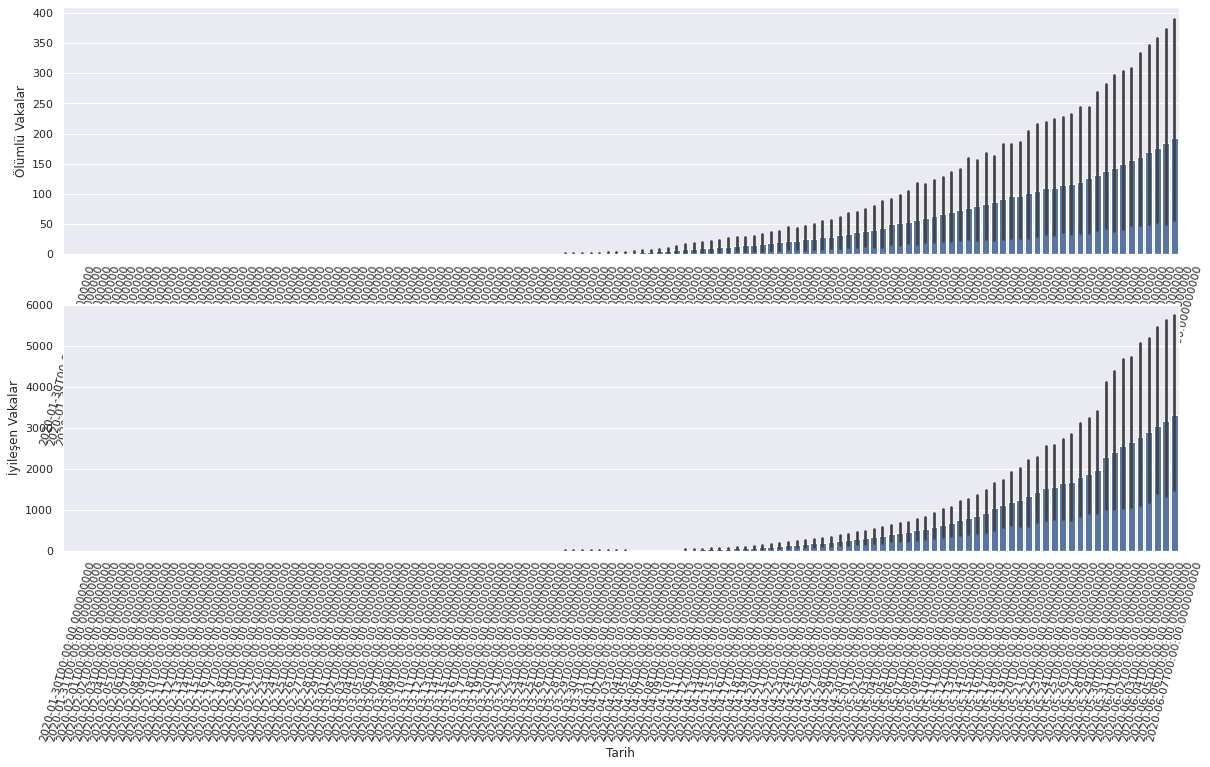

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(df_india["Date"],df_india["Deaths"],color="b")
plt.xlabel("Tarih")
plt.ylabel("Ölümlü Vakalar")
plt.xticks(rotation=75)
plt.subplot(2,1,2)
sns.barplot(df_india["Date"],df_india["Cured"],color="b")

plt.xlabel("Tarih")
plt.ylabel("İyileşen Vakalar")

plt.xticks(rotation=75)
plt.show()


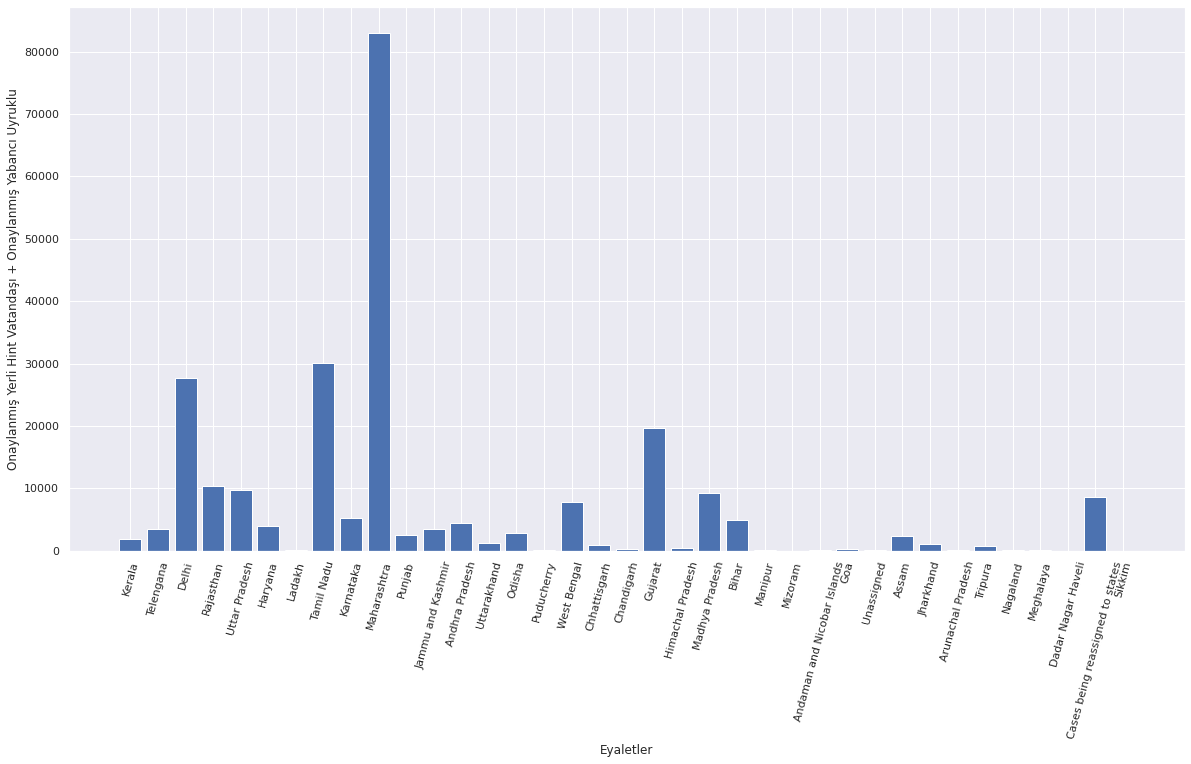

In [26]:
plt.figure(figsize=(20,10))
plt.bar(df_india["State/UnionTerritory"],df_india["Confirmed"])
plt.xlabel("Eyaletler")
plt.ylabel("Onaylanmış Yerli Hint Vatandaşı + Onaylanmış Yabancı Uyruklu")
plt.xticks(rotation=75)
plt.show()

*Onaylanmış Vakaların eyaletlere göre dağılımı*

In [27]:
df_india_date_wise["Date"] = pd.to_datetime(df_india_date_wise["Date"],infer_datetime_format=True)

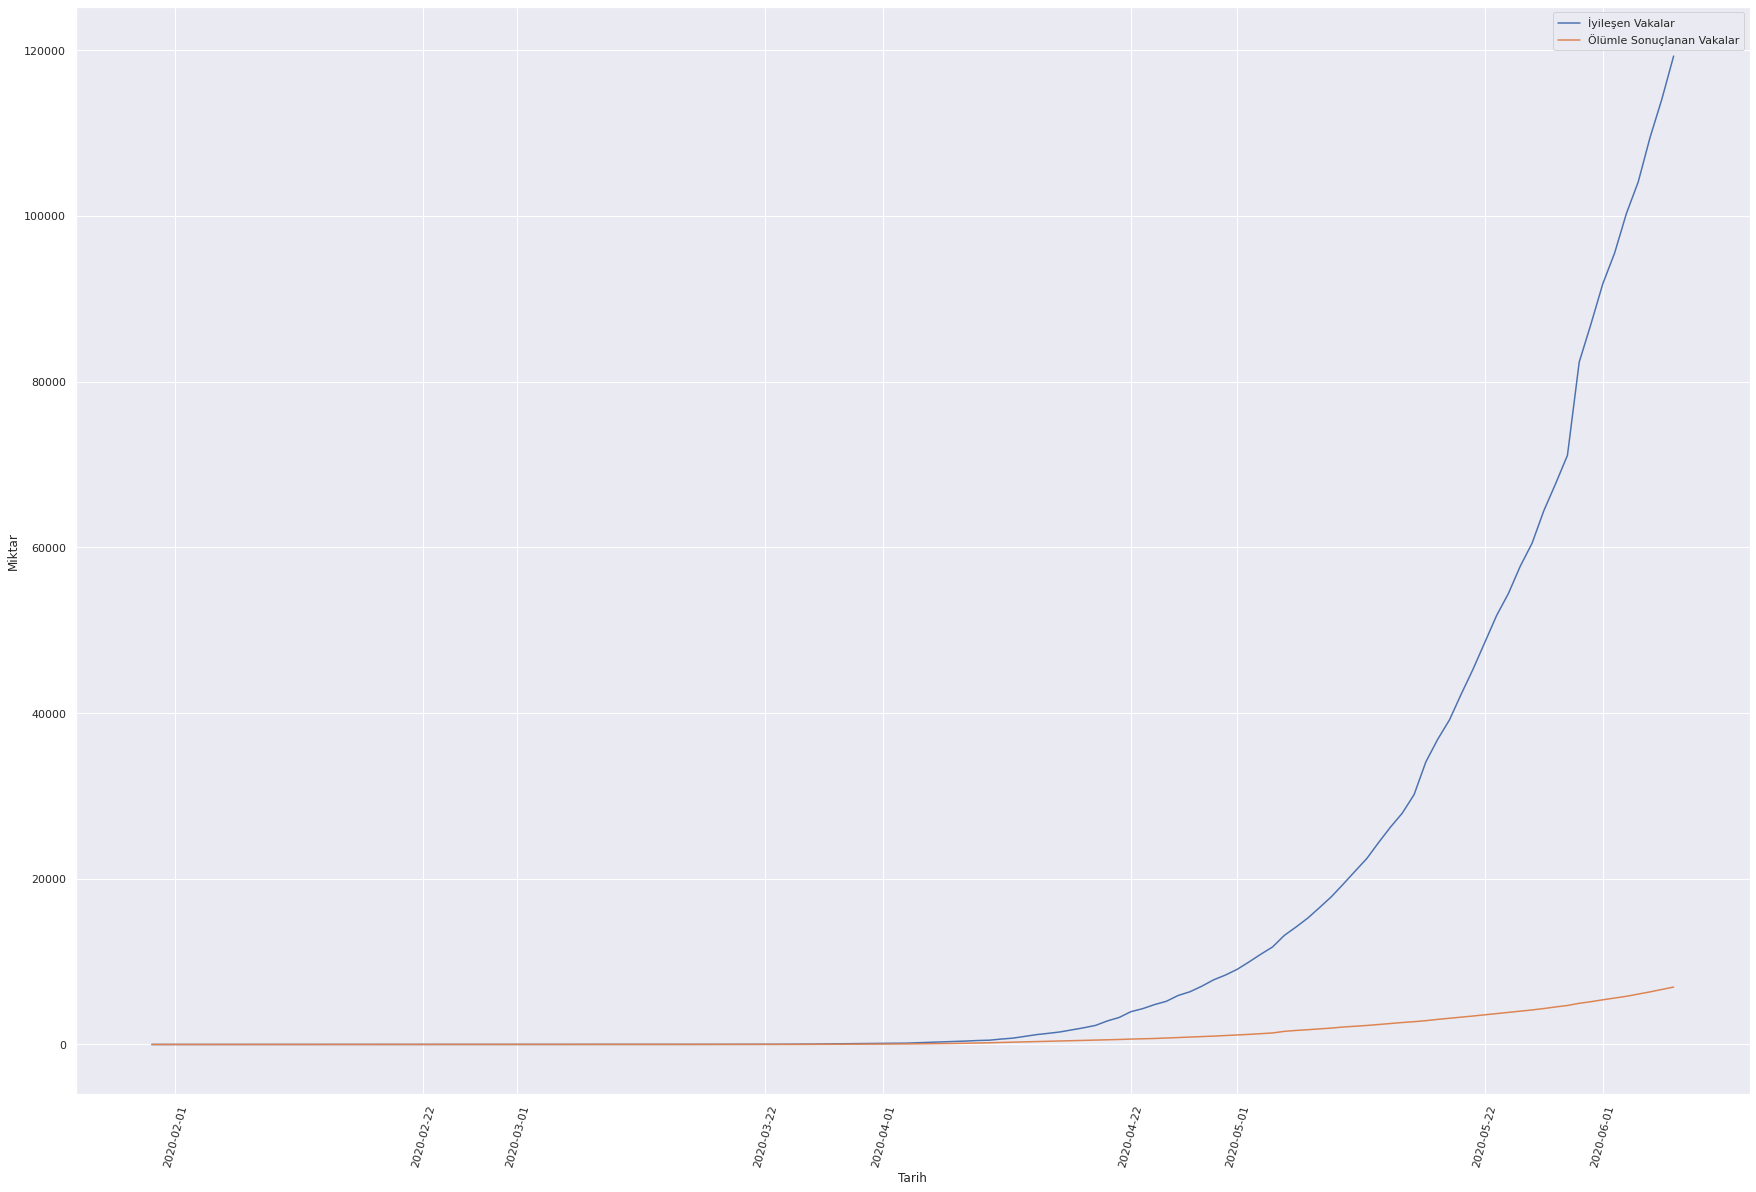

In [28]:
plt.figure(figsize=(30,20))
sns.lineplot(tmp["Date"],tmp["Cured"])
sns.lineplot(tmp["Date"],tmp["Deaths"])
plt.xlabel("Tarih")
plt.ylabel("Miktar")
plt.xticks(rotation=75)
plt.legend(["İyileşen Vakalar","Ölümle Sonuçlanan Vakalar"])
plt.show()

*İyileşen vaka sayısında yüksek bir artış var. Ancak ölüm sayısında henüz bir azalma gözükmüyor.*

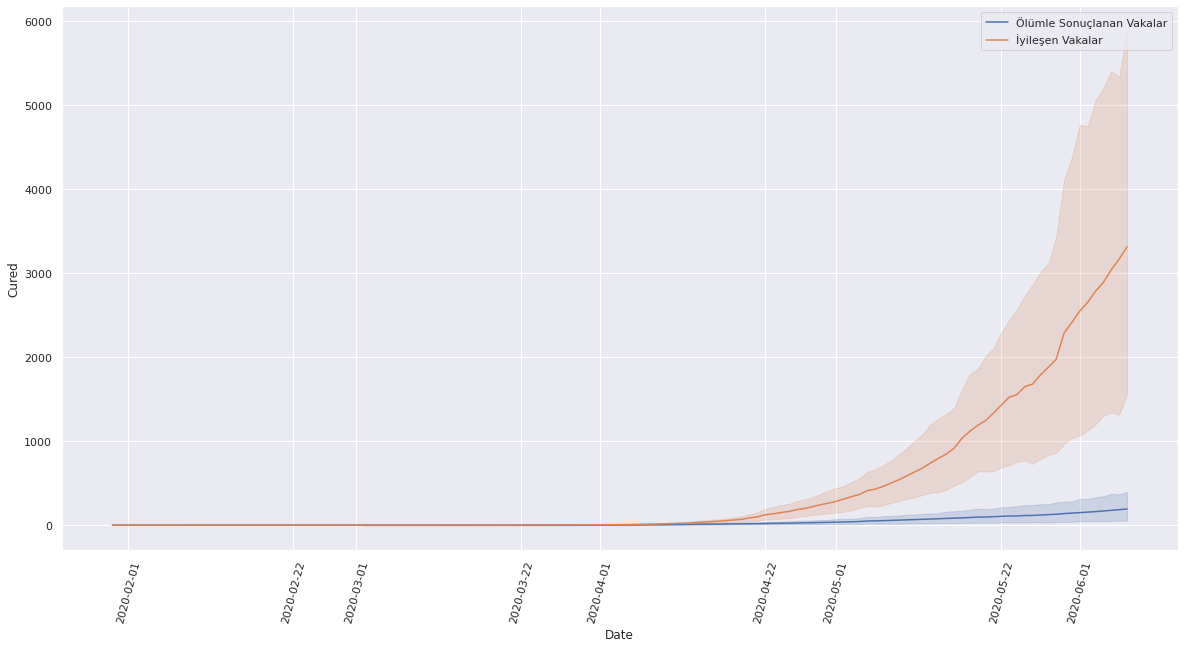

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(df_india["Date"],df_india["Deaths"])
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
sns.lineplot(df_india["Date"],df_india["Cured"])
plt.legend(["Ölümle Sonuçlanan Vakalar","İyileşen Vakalar"])
plt.xticks(rotation=75)
plt.show()

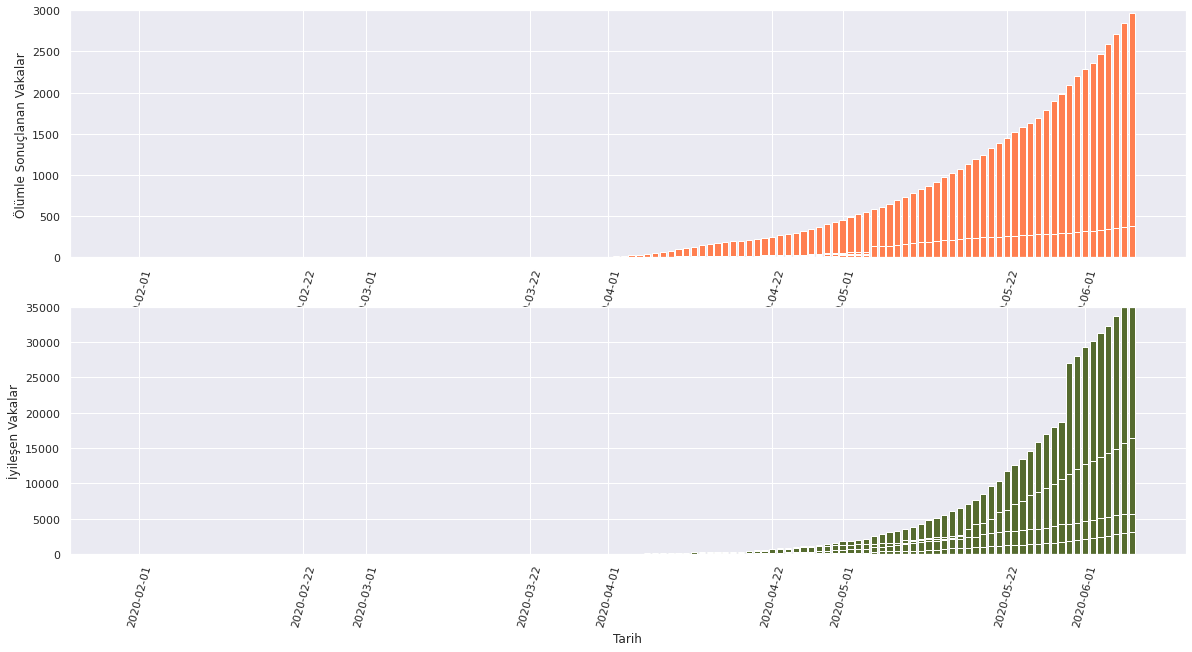

In [30]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["Date"],df_india["Deaths"],color='coral')
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 3000)
plt.xlabel("Tarih")
plt.ylabel("Ölümle Sonuçlanan Vakalar")

plt.subplot(2,1,2)
plt.bar(df_india["Date"],df_india["Cured"],color='darkolivegreen')
plt.xlabel("Tarih")
plt.ylabel("İyileşen Vakalar")
plt.ylim(0, 35000)

plt.xticks(rotation=75)
plt.show()

*Tarihlere göre iyileşen vaka ve ölümle sonuçlanan vaka sayıları*

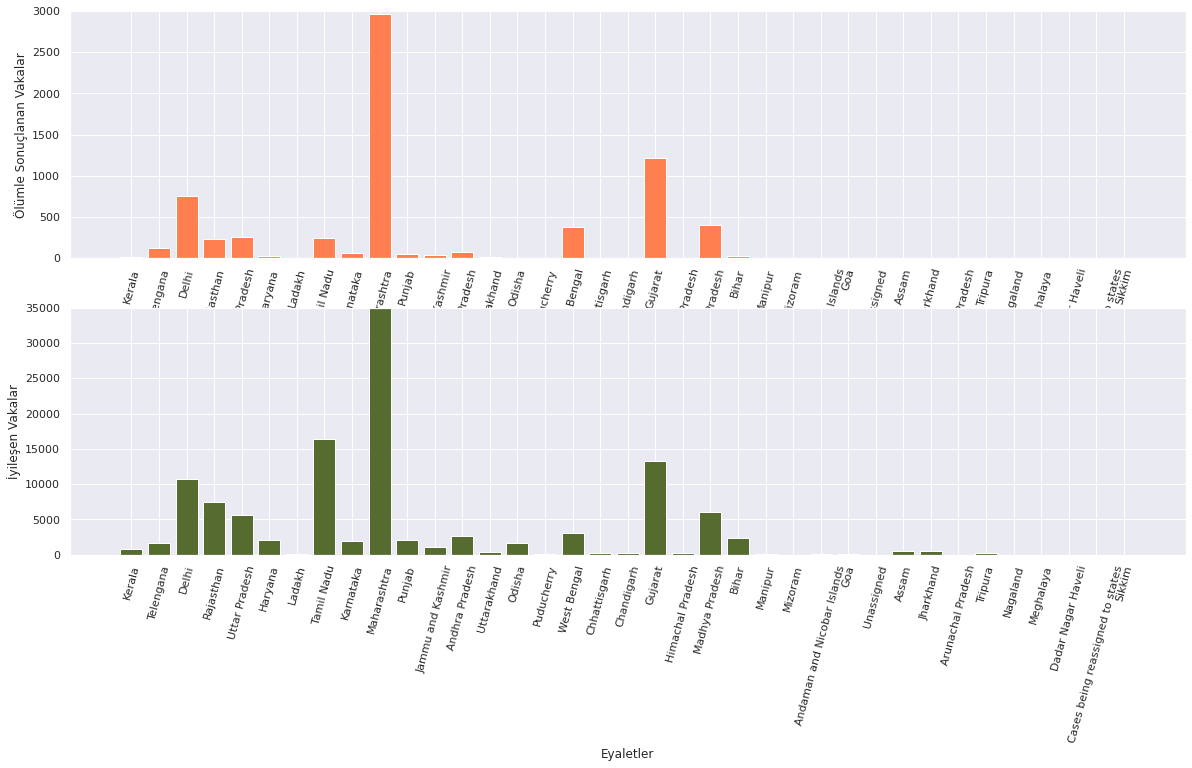

In [31]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.bar(df_india["State/UnionTerritory"],df_india["Deaths"],color='coral')
# plt.bar(df_india["Date"],df_india["ConfirmedIndianNational"])
plt.xticks(rotation=75)
plt.ylim(0, 3000)
plt.xlabel("Eyalet")
plt.ylabel("Ölümle Sonuçlanan Vakalar")

plt.subplot(2,1,2)
plt.bar(df_india["State/UnionTerritory"],df_india["Cured"],color='darkolivegreen')
plt.xlabel("Eyaletler")
plt.ylabel("İyileşen Vakalar")
plt.ylim(0, 35000)

plt.xticks(rotation=75)
plt.show()

In [32]:
df_individual = pd.read_csv("/kaggle/input/covid19-in-india/IndividualDetails.csv")
df_individual.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [33]:
df_individual['gender']=df_individual['gender'].fillna("UNK")

In [34]:
df_individual["age"] = df_individual["age"].fillna(0)
df_individual["age"] = df_individual['age'].replace('28-35',32)

In [35]:
df_individual['diagnosed_date']=pd.to_datetime(df_individual['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [36]:
df_individual['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

*Sırasıyla hastana yatan,kurtarılan, vefat eden, başka bir hastaneye nakil edilen hasta sayısı*

In [37]:
df_individual.isnull().sum()

id                        0
government_id         25185
diagnosed_date            0
age                       0
gender                    0
detected_city         25832
detected_district      6984
detected_state            0
nationality           25473
current_status            0
status_change_date      402
notes                  1335
dtype: int64

In [38]:
df_individual[df_individual['detected_state'].isnull()]

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes


In [39]:
df_individual['gender'].value_counts()

UNK    22869
M       3547
F       1766
Name: gender, dtype: int64

*Vakalardaki cinsiyet sayısı.*

In [40]:
df_individual_tmp = df_individual

In [41]:
df_individual_tmp.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,2020-01-30,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,2020-02-02,0,UNK,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,2020-02-03,0,UNK,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,2020-03-02,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,2020-03-02,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."


In [42]:
df_individual_tmp["age"].value_counts()

0      25836
35        89
32        74
40        63
30        60
       ...  
1.5        1
0.4        1
98         1
0.3        1
92         1
Name: age, Length: 93, dtype: int64

In [43]:
df_individual_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28182 entries, 0 to 28181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  28182 non-null  int64         
 1   government_id       2997 non-null   object        
 2   diagnosed_date      28182 non-null  datetime64[ns]
 3   age                 28182 non-null  object        
 4   gender              28182 non-null  object        
 5   detected_city       2350 non-null   object        
 6   detected_district   21198 non-null  object        
 7   detected_state      28182 non-null  object        
 8   nationality         2709 non-null   object        
 9   current_status      28182 non-null  object        
 10  status_change_date  27780 non-null  object        
 11  notes               26847 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 2.6+ MB


In [44]:
df_individual_tmp['diagnosed_date']=pd.to_datetime(df_individual_tmp['diagnosed_date'],dayfirst=True,infer_datetime_format=True)

In [45]:
df_individual_tmp['current_status'].value_counts()

Hospitalized    27953
Recovered         182
Deceased           46
Migrated            1
Name: current_status, dtype: int64

In [46]:
deaths_state=df_individual_tmp['detected_state'][df_individual_tmp['current_status']=='Deceased'].value_counts()

In [47]:
deaths_state=dict(deaths_state)

In [48]:
df_age_group.head(20)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


Vakaların yaş aralığı

In [49]:
df_age_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


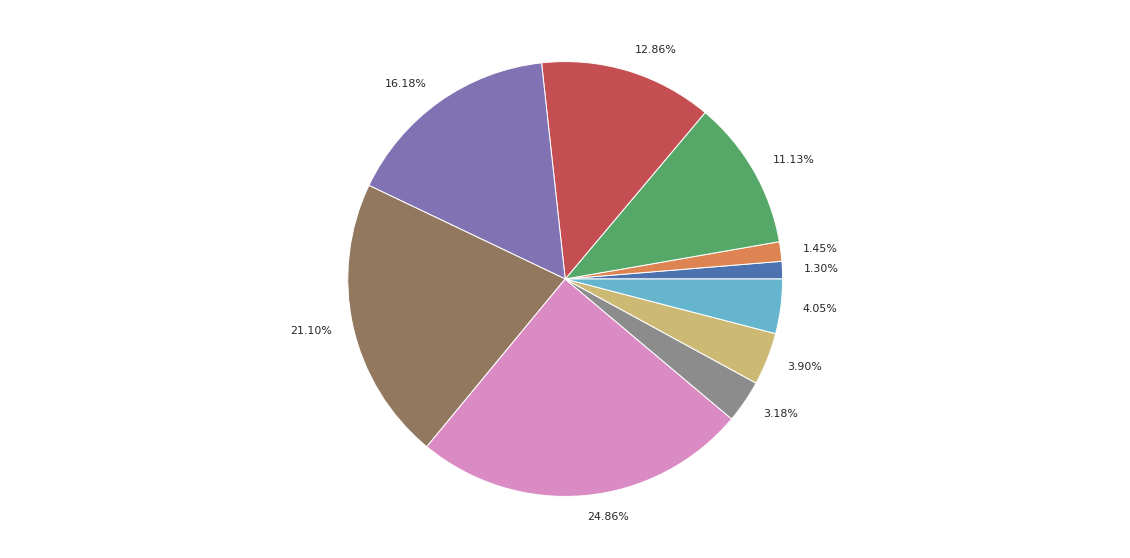

In [50]:
from matplotlib.pyplot import pie, axis
plt.figure(figsize=(20,10))
sums = df_age_group.groupby(df_age_group["Percentage"])["TotalCases"].sum()
axis('equal');
pie(sums, labels=sums.index);

plt.show()

*Yaş aralıkların yüzdelik dilimleri*

In [51]:
df_imcrt.head()

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


In [52]:
df_imcrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [53]:
df_population.shape

(36, 8)

In [54]:
df_hospital_bed.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [55]:
df_hospital_bed.shape

(37, 12)

In [56]:
recent_date = df_india['Date'].max()
mortality_statewise = df_india[df_india['Date']==recent_date]

In [57]:
mortality_statewise.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
2738,2020-06-07,8:00 AM,Andaman and Nicobar Islands,0,0,33,0,33,33,0
2739,2020-06-07,8:00 AM,Andhra Pradesh,0,0,2620,73,4510,4510,1817
2740,2020-06-07,8:00 AM,Arunachal Pradesh,0,0,1,0,47,47,46
2741,2020-06-07,8:00 AM,Assam,0,0,547,4,2397,2397,1846
2742,2020-06-07,8:00 AM,Bihar,0,0,2425,30,4915,4915,2460


In [58]:
mortality_statewise.shape

(36, 10)

In [59]:
mortality_statewise['Recovery_Rate']=(mortality_statewise['Cured']/mortality_statewise['Total Cases'])*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
mortality_statewise.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases,Recovery_Rate
2738,2020-06-07,8:00 AM,Andaman and Nicobar Islands,0,0,33,0,33,33,0,100.000000
2739,2020-06-07,8:00 AM,Andhra Pradesh,0,0,2620,73,4510,4510,1817,58.093126
2740,2020-06-07,8:00 AM,Arunachal Pradesh,0,0,1,0,47,47,46,2.127660
2741,2020-06-07,8:00 AM,Assam,0,0,547,4,2397,2397,1846,22.820192
2742,2020-06-07,8:00 AM,Bihar,0,0,2425,30,4915,4915,2460,49.338759


In [61]:
covid_19_india_color=covid_19_india[["Date",'State/UnionTerritory','Confirmed','Cured','Deaths']]
covid_19_india_color=covid_19_india_color.sort_values(['Confirmed'],ascending=False)

** Eyaletlerdeki Vaka İstatistikleri**

In [62]:
covid_19_india_color.style.background_gradient(cmap='Reds')

,Date,State/UnionTerritory,Confirmed,Cured,Deaths
2757,2020-06-07 00:00:00,Maharashtra,82968,37390,2969
2767,2020-06-07 00:00:00,Tamil Nadu,30152,16395,251
2746,2020-06-07 00:00:00,Delhi,27654,10664,761
2748,2020-06-07 00:00:00,Gujarat,19592,13316,1219
2765,2020-06-07 00:00:00,Rajasthan,10331,7501,231
2771,2020-06-07 00:00:00,Uttar Pradesh,9733,5648,257
2756,2020-06-07 00:00:00,Madhya Pradesh,9228,6108,399
2773,2020-06-07 00:00:00,Cases being reassigned to states,8605,0,0
2772,2020-06-07 00:00:00,West Bengal,7738,3119,383
2753,2020-06-07 00:00:00,Karnataka,5213,1968,59


# Tahminleme İşlemleri(Desicion Tree)

In [63]:
#Tahmin yapacağımız veri seti
df_india = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")
#Ölüm sayılarını görmek için 2000 dedim
df_india.head(2000)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1995,1996,16/05/20,8:00 AM,Tamil Nadu,-,-,2599,71,10108
1996,1997,16/05/20,8:00 AM,Telengana,-,-,959,34,1454
1997,1998,16/05/20,8:00 AM,Tripura,-,-,42,0,156
1998,1999,16/05/20,8:00 AM,Uttarakhand,-,-,51,1,82


In [64]:
#Mevcut columnları görmek için kullanıcaz aşağıdaki kodu yazıyoruz.
df_india.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [65]:
#işimize yarayan kolonları alıyoruz
selected_features=['Sno','Cured','Deaths','Confirmed']
X=df_india[selected_features]

**Tahmin edeceğimiz değer olan Deaths kolonundaki değerleri y’ye aktarıp içeriğini görmek için aşağıdaki kodu çalıştıralım**

In [66]:
y=df_india.Deaths
y.describe()

count    2774.000000
mean       52.670151
std       212.795903
min         0.000000
25%         0.000000
50%         1.000000
75%        15.000000
max      2969.000000
Name: Deaths, dtype: float64

**Modelimizi (Decision Tree) eğitmek ve sonra performansını görmek için elimizdeki (X,y) verisini %80 train ve % 20 test şeklinde ayırmak için aşağıdaki kodu çalıştıralım**

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

**Şimdi Decision Tree algoritmasını çağırıp Train/Test olarak böldüğümüz veri ile eğiteceğiz. **

In [68]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

**Şimdi modelimizin performansını Mean Absolute Error (Tahmin ile gerçek değer arasındaki farkın ortalaması) metodu ile ölçelim. Bunun için aşağıdaki kodu çalıştırıyoruz:**

In [69]:
from sklearn.metrics import mean_absolute_error
olum_tahmin_oranı=regressor.predict(X_test)
mean_absolute_error(y_test,olum_tahmin_oranı)

1.1261261261261262

*Bu sonuc (1.126126 degeri) şu anlama geliyor:
Gerçek değer ile tahmini değer arasındaki farkın ortalaması örneğin 1 çıkması gereken değer 1.126 civarında olmakta. Yani model pekte kötü olmayan bir tahmin yapıyor !
Buradan cikarilacak sonuclar
i) Bir model her zaman kaliteli sonuclar üretmeyebilir
ii) Modeli eğitmekte kullandığımız kolonlardan daha uygunları seçilirse (feature selection, extraction) tahmin yeteneği gelişebilir
iii) Baska algoritmalar kullanıllabilir/test edilebilir
iv) Varsa modelin (özellikle Deep Learning’te gerekiyor) parametrelerini ayarlamak (parameter tuning) performansı arttırabilir.*

# Lojistik Regresyon

In [70]:
#Tahmin yapacağımız veri seti
import pandas as pd
dataset = pd.read_csv("/kaggle/input/covid19-in-india/covid_19_india.csv")
#verilerimizi sayısal veriye dönüştürüyoruz.
dataset=pd.get_dummies(dataset)
dataset.columns

Index(['Sno', 'Cured', 'Deaths', 'Confirmed', 'Date_01/02/20', 'Date_01/03/20',
       'Date_01/04/20', 'Date_01/05/20', 'Date_01/06/20', 'Date_02/02/20',
       ...
       'ConfirmedForeignNational_1', 'ConfirmedForeignNational_10',
       'ConfirmedForeignNational_11', 'ConfirmedForeignNational_14',
       'ConfirmedForeignNational_2', 'ConfirmedForeignNational_3',
       'ConfirmedForeignNational_6', 'ConfirmedForeignNational_7',
       'ConfirmedForeignNational_8', 'ConfirmedForeignNational_9'],
      dtype='object', length=252)

In [71]:
dataset.head(2000)

,Sno,Cured,Deaths,Confirmed,Date_01/02/20,Date_01/03/20,Date_01/04/20,Date_01/05/20,Date_01/06/20,Date_02/02/20,...,ConfirmedForeignNational_1,ConfirmedForeignNational_10,ConfirmedForeignNational_11,ConfirmedForeignNational_14,ConfirmedForeignNational_2,ConfirmedForeignNational_3,ConfirmedForeignNational_6,ConfirmedForeignNational_7,ConfirmedForeignNational_8,ConfirmedForeignNational_9
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,2599,71,10108,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,1997,959,34,1454,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,1998,42,0,156,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,1999,51,1,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
dataset.shape

(2774, 252)

In [73]:
#toplam hasta,sayısı,hastalık artış miktarını alıyoruz
X = dataset.iloc[:, [1,4]].values
#ölümleri tahmim etmeye çalışıyoruz
y = dataset.iloc[:, 3].values

**Verisetindeki kayıtların %25 ini test için ayırdık**

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Bağımsız değişkenlerden toplam hasta sayısı ile artış miktarları aynı birimde olmadığı için feature scaling uygulayacağız.

In [75]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Lojistik regresyon modeli için scikit-learn kütüphanesinin linear_model modülünün LogisticRegression sınıfını kullanacağız. Nesnemizi oluşturup eğitim verisiyle eğitelim.**

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Test Setini Tahmin Etmek**

In [77]:
y_pred = classifier.predict(X_test)

**Hata Matrisini Oluşturma,
Yaptığımız sınıflandırmanın doğruluğunu kontrol etme yöntemlerinden birisi de hata matrisi oluşturmaktır. Hata matrisi için scikit-learn kütüphanesi metrics modülü confusion_matrix fonksiyonunu kullanıyoruz.**

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  1  0 ...  0  0  0]
 [ 0 65  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]]


**Lojistik Regresyon Grafiğini Çizme**

*Bu kısımda CPU ile ilgili sorun aldıüım için kodları açıklama satırına aldım*

In [79]:
#from matplotlib.colors import ListedColormap
#X_set, y_set = X_train, y_train
#X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
#                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
#plt.xlim(X1.min(), X1.max())
#plt.ylim(X2.min(), X2.max())
#for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
#                 c = ListedColormap(('yellow', 'green'))(i), label = j)
#plt.title('Lojistik Regresyon (Eğitim seti)')
#plt.xlabel('Hasta Sayısı')
#plt.ylabel('Onaylanan Vaka Sayısı')
#plt.legend()
#plt.show()